In [8]:
import numpy as np
import pandas as pd
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

In [9]:
#케라스가 내 모델에 맞추기 위해 사용할 수 있는 one-hot 벡터 배열을 one-hot 벡터 배열로 바꾸기
from keras.utils.np_utils import to_categorical
#입력이미지의 shape 이 (batch_size, width, height, n_channels)로 넣어줘야함
X_train = (train[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)

#레이블 준비하기
y_train = to_categorical(train['digit'].values)
#print(X_train[0].shape)
#print(len(y_train))

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 아마 성능 향상의 가장 큰 요인, 데이터 증강
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,Activation
)
from keras.optimizers import Adam
#from keras.layers import LeakyReLU


def deep_cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPool2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    #adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model
model = deep_cnn_advanced()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 50)       

In [12]:
# # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
# from tensorflow import keras
# from tensorflow.keras import layers
# model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
# 좀 더 빨리 하기 위함
from tensorflow.keras.callbacks import LearningRateScheduler
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [14]:
from sklearn.model_selection import train_test_split
epochs = 45
# Train-Test를 9:1로 분리
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_train, y_train, test_size = 0.1)

#fit 메서드로 트레이닝 시작
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

# CNN: Epochs=45, Train accuracy=0.71949, Validation accuracy=0.80488

CNN: Epochs=45, Train accuracy=0.82662, Validation accuracy=0.80488


In [15]:
#fit 메서드로 두번째 트레이닝
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

CNN: Epochs=45, Train accuracy=0.92711, Validation accuracy=0.84390


In [20]:
#fit 메서드로 세번째 트레이닝
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

CNN: Epochs=45, Train accuracy=0.96601, Validation accuracy=0.82439


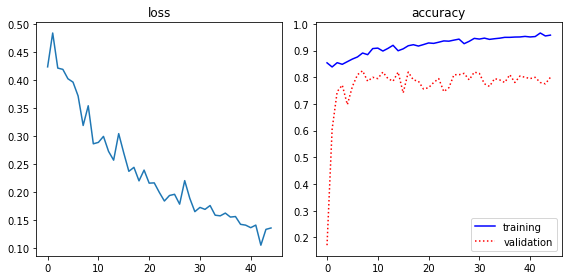

In [21]:
#성능 visualize
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Parameter 및 모델 구조 저장
model.save_weights(f'params.h5')
    
model_json = model.to_json()
with open(f"NewCNN_third", "w") as json_file : 
    json_file.write(model_json)

In [23]:
# 예측 진행
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
#results = model.predict(X_test)
submission['digit']=np.argmax(model.predict(X_test),axis =1)

In [24]:
#submission.digit = results.
submission.to_csv('NewCNN_third.csv', index=False)

In [25]:
#fit 메서드로 네번째 트레이닝
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

CNN: Epochs=45, Train accuracy=0.97350, Validation accuracy=0.84878


In [26]:
# Parameter 및 모델 구조 저장
model.save_weights(f'params.h5')
    
model_json = model.to_json()
with open(f"NewCNN_forth", "w") as json_file : 
    json_file.write(model_json)

In [27]:
# 예측 진행
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
#results = model.predict(X_test)
submission['digit']=np.argmax(model.predict(X_test),axis =1)

In [28]:
#submission.digit = results
submission.to_csv('NewCNN_forth.csv', index=False)

In [29]:
#fit 메서드로 다섯번째 트레이닝
hist = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=32),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=0
)
print(
    f"CNN: Epochs={epochs:d}, " +
    f"Train accuracy={max(hist.history['acc']):.5f}, " +
    f"Validation accuracy={max(hist.history['val_acc']):.5f}"
)

CNN: Epochs=45, Train accuracy=0.98288, Validation accuracy=0.82927


In [30]:
# Parameter 및 모델 구조 저장
model.save_weights(f'params.h5')
    
model_json = model.to_json()
with open(f"NewCNN_fifth", "w") as json_file : 
    json_file.write(model_json)

In [31]:
# 예측 진행
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
#results = model.predict(X_test)
submission['digit']=np.argmax(model.predict(X_test),axis =1)

In [32]:
#submission.digit = results
submission.to_csv('NewCNN_fifth.csv', index=False)